In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import pickle
import tqdm
import tqdm.notebook

In [14]:
%matplotlib inline
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')

In [15]:
IN_VEL_FILE = '../feature_data/input_velocities.csv'
IN_VEL_FILE_TEST = '../feature_data/input_velocities_test.csv'

# Keys to the pickle objects
CITY = 'city'
LANE = 'lane'
LANE_NORM = 'lane_norm'
SCENE_IDX = 'scene_idx'
AGENT_ID = 'agent_id'
P_IN = 'p_in'
V_IN = 'v_in'
P_OUT = 'p_out'
V_OUT = 'v_out'
CAR_MASK = 'car_mask'
TRACK_ID = 'track_id'

# Column headers in the CSV files
WAS_TARGET = 'was_target'
V_IN_X = ['v_in_x' + str(i) for i in range(1, 20)]
V_IN_Y = ['v_in_y' + str(i) for i in range(1, 20)]

In [16]:
def describe(a, desc):
    print(f"{desc}")
    print(f"min = {np.min(a)}")
    print(f"max = {np.max(a)}")
    print(f"mean = {np.mean(a)}")
    print(f"median = {np.median(a)}")
    print(f"standard deviation = {np.std(a)}\n")

In [17]:
def plot_hist(x, y, bins, title, palette, xlbl, ylbl, fname):
    """
    Plots a histogram of the two arrays x and y.
    """
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    sns.set_palette(palette)
    sns.histplot(ax=ax1, x=x, y=y, bins=bins, cbar=True)
    ax1.set_xlabel(xlbl)
    ax1.set_ylabel(ylbl);
    ax1.set_title(title);
    plt.savefig(fname)

# Distribution of input velocities (training)

In [18]:
df = pd.read_csv(IN_VEL_FILE)

In [19]:
# Get input velocities by group
xtarg = df[df[WAS_TARGET] == 1][V_IN_X].to_numpy()
xtarg = xtarg.reshape(xtarg.shape[0] * xtarg.shape[1])
ytarg = df[df[WAS_TARGET] == 1][V_IN_Y].to_numpy()
ytarg = ytarg.reshape(ytarg.shape[0] * ytarg.shape[1])

xnon = df[df[WAS_TARGET] == 0][V_IN_X].to_numpy()
xnon = xnon.reshape(xnon.shape[0] * xnon.shape[1])
ynon = df[df[WAS_TARGET] == 0][V_IN_Y].to_numpy()
ynon = ynon.reshape(ynon.shape[0] * ynon.shape[1])

xall = df[V_IN_X].to_numpy()
xall = xall.reshape(xall.shape[0] * xall.shape[1])
yall = df[V_IN_Y].to_numpy()
yall = yall.reshape(yall.shape[0] * yall.shape[1])

In [20]:
describe(xall, 'input x velocities')

input x velocities
min = -222.6323547363281
max = 290.52691650390625
mean = 0.16118329224158862
median = 0.0006085641798563303
standard deviation = 4.566191005421228



In [21]:
describe(yall, 'input y velocities')

input y velocities
min = -179.869384765625
max = 270.28366088867193
mean = -0.18538976897596968
median = -0.000922679202631116
standard deviation = 5.640785253866921



<AxesSubplot:ylabel='Count'>

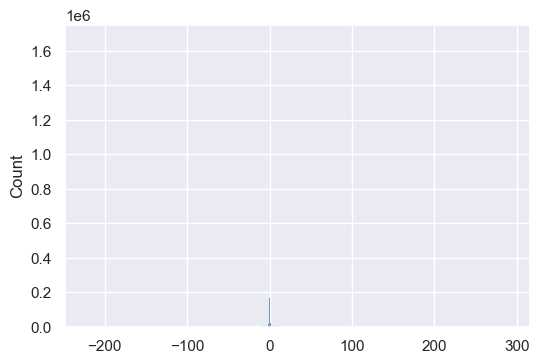

In [22]:
sns.histplot(x=xall)

In [ ]:
# Plot the positions
title = 'Target agent input velocities (train)'
palette = 'Reds'
bins = 1000
x_label, y_label = 'xvel', 'vel'
fname = '../milestone_images/inVelTargTrain'
plot_hist(xtarg, ytarg, bins, title, palette, x_label, y_label, fname)

title = 'Non-target-agent input velocities (train)'
palette = 'Greens'
fname = '../milestone_images/inVelNonTrain'
plot_hist(xtarg, ytarg, bins, title, palette, x_label, y_label, fname)

title = 'All agent input velocities (train)'
palette = 'plasma'
fname = '../milestone_images/inVelTrain'
plot_hist(xall, yall, bins, title, palette, x_label, y_label, fname)

# Distribution of input velocities (test)

In [12]:
df = pd.read_csv(IN_VEL_FILE_TEST)

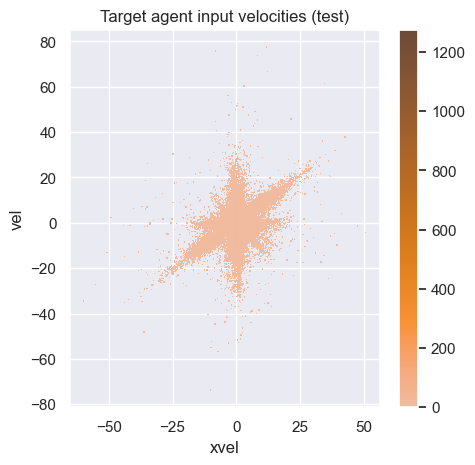

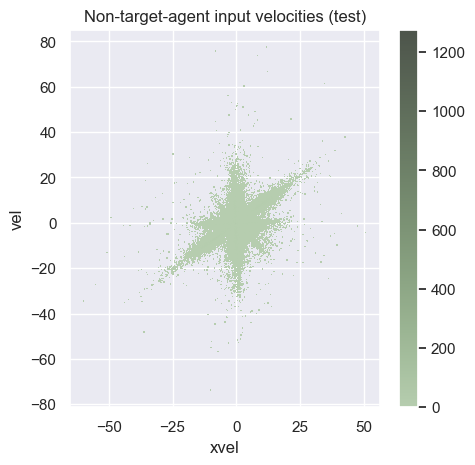

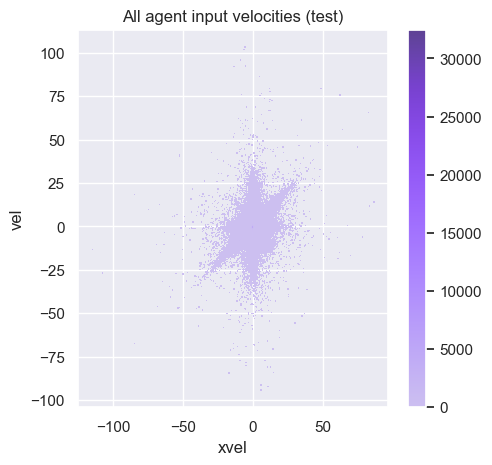

In [14]:
# Get input velocities by group
xtarg = df[df[WAS_TARGET] == 1][V_IN_X].to_numpy()
xtarg = xtarg.reshape(xtarg.shape[0] * xtarg.shape[1])
ytarg = df[df[WAS_TARGET] == 1][V_IN_Y].to_numpy()
ytarg = ytarg.reshape(ytarg.shape[0] * ytarg.shape[1])

xnon = df[df[WAS_TARGET] == 0][V_IN_X].to_numpy()
xnon = xnon.reshape(xnon.shape[0] * xnon.shape[1])
ynon = df[df[WAS_TARGET] == 0][V_IN_Y].to_numpy()
ynon = ynon.reshape(ynon.shape[0] * ynon.shape[1])

xall = df[V_IN_X].to_numpy()
xall = xall.reshape(xall.shape[0] * xall.shape[1])
yall = df[V_IN_Y].to_numpy()
yall = yall.reshape(yall.shape[0] * yall.shape[1])

# Plot the positions
title = 'Target agent input velocities (test)'
palette = 'Reds'
bins = 1000
x_label, y_label = 'xvel', 'vel'
fname = '../milestone_images/inVelTargTest'
plot_hist(xtarg, ytarg, bins, title, palette, x_label, y_label, fname)

title = 'Non-target-agent input velocities (test)'
palette = 'Greens'
fname = '../milestone_images/inVelNonTest'
plot_hist(xtarg, ytarg, bins, title, palette, x_label, y_label, fname)

title = 'All agent input velocities (test)'
palette = 'plasma'
fname = '../milestone_images/inVelTest'
plot_hist(xall, yall, bins, title, palette, x_label, y_label, fname)